In [130]:
# load packages
import mne as mne
mne.set_log_level('error')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/Kya_Masoumi/anaconda3/lib/python3.11/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


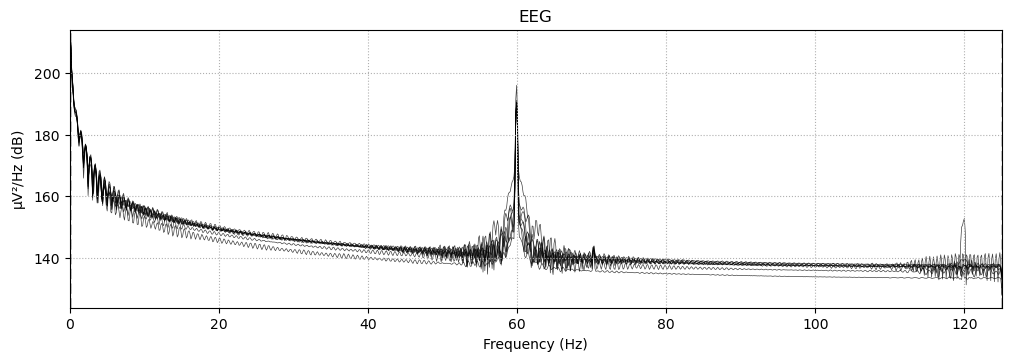

In [131]:
# load data from .csv file name 'meditation_recording_recent.csv'
data = pd.read_csv('meditation_recording_recent.csv', skiprows=0, usecols={*range(0, 8)}, header=0)

# channel info (check electode placement/name and columsn in data)
ch_names = ['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8']
sfreq = 250
ch_types = ['eeg'] * 8 # 8 channels of EEG data

# create info object and raw data object
info = mne.create_info(ch_names, sfreq, ch_types=ch_types)
raw = mne.io.RawArray(data.T, info)
raw.plot_psd()

In [133]:
# raw.set_montage('standard_1020')

raw.apply_function(lambda x: x * 1e-6)

raw.filter(2,30, method='fft')


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,8 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,2.00 Hz
Lowpass,30.00 Hz


In [134]:
# isolate the MW events
events = mne.find_events(raw, stim_channel='button_press')

# check lines 45-59 in detector.py for more info on how this works
# isolate the button press events


ValueError: No stim channel found to extract event triggers.

In [135]:
print(raw._data.shape)
print(raw.info.keys())
raw.info

(8, 59999)
dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,8 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,2.00 Hz
Lowpass,30.00 Hz


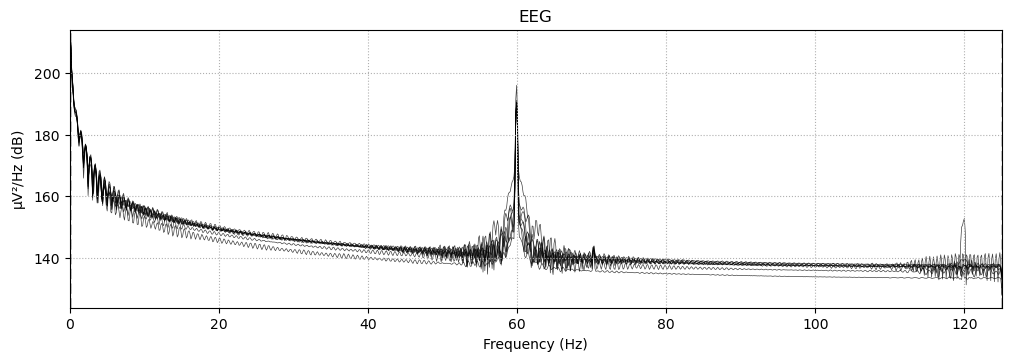

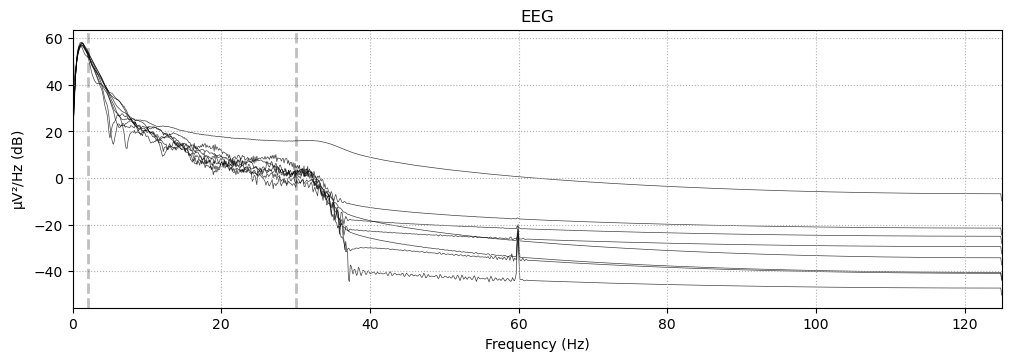

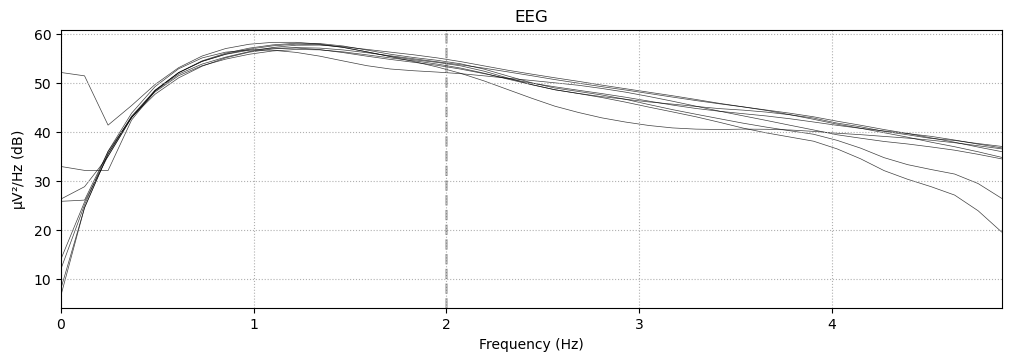

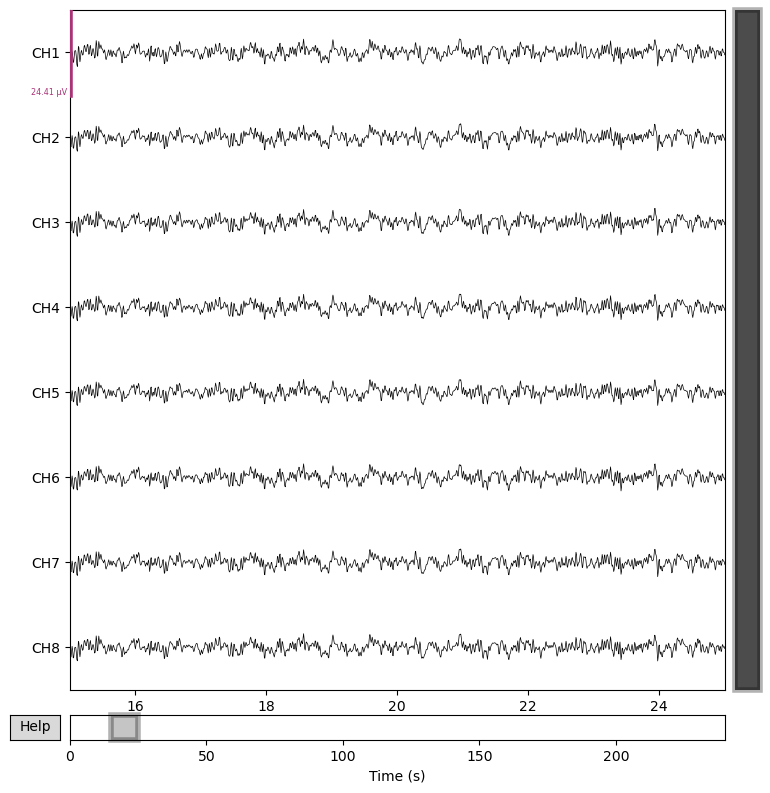

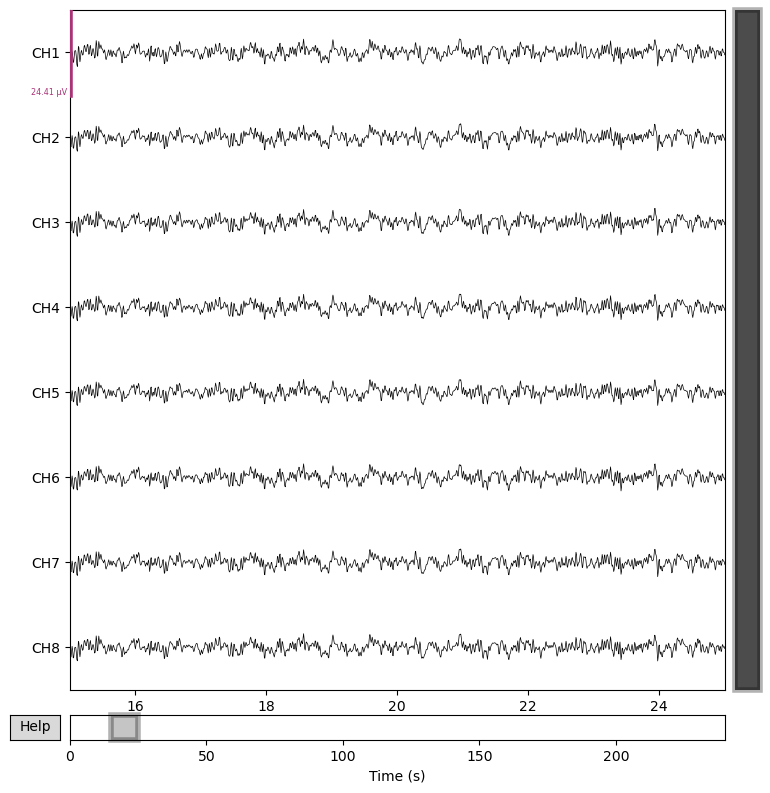

In [139]:
raw.plot(start=15, duration=10, n_channels=8, scalings='auto')

In [136]:
#calculate scan duration
scan_durn = raw._data.shape[1] / raw.info['sfreq']
scan_durn

239.996

In [140]:
# make epochs
epochs = mne.Epochs(raw, events, tmin=0, tmax=scan_durn, baseline=None, detrend=1, preload=True, event_repeated='drop',
                    reject = dict(eeg=1e-3))

labels = epochs.events[:, -1]
psd = epochs.compute_psd(method='multitaper', tmin=0, tmax=scan_durn, fmin=2, fmax=30, picks='eeg')


NameError: name 'events' is not defined

In [ ]:
# convert to db and reshape
psd_db = 10 * np.log10(psd)
psd_db = psd_db.reshape(psd_db.shape[0], psd_db.shape[1], psd_db.shape[2] * psd_db.shape[3])


In [ ]:
# linear discriminant analysis
